# **Customer Personality Analysis**

**Index:**

1. [Problem statement and Data description](#s1)
2. [Importing libraries and dataset](#s2)
3. [Data Cleaning and Feature Engineering](#s3)
4. [Exploratory Data Analysis](#s4)
5. [Data Preprocessing](#s5)
6. [Principal Component Analysis(PCA)](#s11)
6. [Creating the RFM model (Recency, Frequency,Monetary value)](#s6)
7. [Model Selection](#s7)
8. [K-Means Clustering](#s8)
9. [Hierarchical Clustering](#s9)
10.[Conclusions](#s10)

<a name='s1'></a>
#**Problem Statement**

We are given a certain dataset of any ecommerce company about the transactions made through online or offline mode.
We are required to cluster the these data based on certain similarities so that the company can make some strategies towards the different types of customers to maximise their profits.

### **Business Goal**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers.
It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### **Data Description**

**People**:

1.ID: Customer's unique identifier.

2.Year_Birth: Customer's birth year.

3.Education: Customer's education level.

4.Marital_Status: Customer's marital status.

5.Income: Customer's yearly household income.

6.Kidhome: Number of children in customer's household.

7.Teenhome: Number of teenagers in customer's household.

8.Dt_Customer: Date of customer's enrollment with the company.

9.Recency: Number of days since customer's last purchase.

10.Complain: 1 if customer complained in the last 2 years, 0 otherwise.

**Products**

1.MntWines: Amount spent on wine in last 2 years.

2.MntFruits: Amount spent on fruits in last 2 years.

3.MntMeatProducts: Amount spent on meat in last 2 years.

4.MntFishProducts: Amount spent on fish in last 2 years.

5.MntSweetProducts: Amount spent on sweets in last 2 years.

6.MntGoldProds: Amount spent on gold in last 2 years.

**Promotions**

1.NumDealsPurchases: Number of purchases made with a discount.

2.AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise.

3.AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.

4.AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.

5.AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.

6.AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise.

**Plateform**

1.NumWebPurchases: Number of purchases made through the company’s web site.

2.NumCatalogPurchases: Number of purchases made using a catalogue.

3.NumStorePurchases: Number of purchases made directly in stores.

4.NumWebVisitsMonth: Number of visits to company’s web site in the last month.

<a name='s2'></a>
#**Importing libraries and dataset**

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('/content/marketing_campaign.csv')

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


<a name='s3'></a>
# **Data Cleaning and Feature Engineering**

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* The "Income" column contains some null values. 


* Since there are only few null values for "Income", we will delete these rows rather than replacing the values with mean or anything else.


In [ ]:
df = df[~df['Income'].isna()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

Looking for the unique values in data

In [ ]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Since "Z_CostContact" and "Z_Revenue" contains only one unique values, that means all the rows have same value for this column. We will drop these columns as there will be any contribution to the result from these features.

In [ ]:
df.drop(columns=['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [ ]:
df.shape

(2216, 27)

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
sorted(df['Income'],reverse=True)[:10]

[666666.0,
 162397.0,
 160803.0,
 157733.0,
 157243.0,
 157146.0,
 156924.0,
 153924.0,
 113734.0,
 105471.0]

As we can obsereve that there is an outlier in the income data having value 666666. Let's remove it.

In [ ]:
df = df[df['Income']!=666666]

**Let's do some univariate analysis on some of the features and create some new features out of existing one and delete the unnecessary features.**

<a name='s4'></a>
# **Exploratory Data Analysis**

## **Univarient Analysis**

## **1. Features related to people**

### **1.1 Year_Birth**

Creating new feature "Age" out of the feature Year_Birth

Since the latest data was collected for 2015, we will consider the age at that time only. So we will take 2015 as the latest year.

In [ ]:
df['Age'] = 2015-df['Year_Birth']

In [ ]:
df['Age'].value_counts()

39     89
44     86
40     83
43     78
37     76
45     75
50     74
42     72
46     70
41     69
59     55
36     53
57     52
63     52
38     51
47     51
49     50
56     50
61     49
55     49
60     48
33     44
52     44
53     44
48     44
64     42
32     41
29     41
58     41
51     41
35     39
34     38
31     38
54     35
62     35
30     32
66     30
26     29
27     29
65     29
28     27
67     21
25     18
69     16
68     16
24     15
23     13
70      8
71      7
72      6
20      5
22      5
21      3
19      2
116     1
74      1
122     1
115     1
75      1
Name: Age, dtype: int64

Here we can see some of the Ages are beyond 100, which is due to the fact that data is older.
Since there is no meaning to take these data as physically these people may not exist. We will consider the only datas having age less than 80. 

In [ ]:
df = df[df['Age']<= 80]

In [ ]:
df.shape

(2212, 28)

### **1.2 Education**

In [ ]:
df['Education'].value_counts()

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

To make it simpler let's categorize it with three groups - Graduate,Undergraduate and Post gradutae.

In [ ]:
df['Education'] = df['Education'].replace(['Basic'], 'UnderGraduate')
df['Education'] = df['Education'].replace(['Graduation'], 'Graduate')
df['Education'] = df['Education'].replace(['PhD','Master','2n Cycle'], 'PostGraduate')

In [ ]:
df['Education'].value_counts()

Graduate         1115
PostGraduate     1043
UnderGraduate      54
Name: Education, dtype: int64

### **1.3 Marital_Status**

In [ ]:
df['Marital_Status'].value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Let's make it simpler by just having married and unmarried feature.

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married','Together'],'married')
df['Marital_Status'] = df['Marital_Status'].replace(['Single','Divorced','Widow','Alone','Absurd','YOLO'],'unmarried')

In [ ]:
df['Marital_Status'].value_counts()

married      1428
unmarried     784
Name: Marital_Status, dtype: int64

### **1.4 Kidhome and Teenhome**

Using "Kidhome" and "Teenhome" lets create a new feature "Children". 

In [ ]:
df['No_of_children'] = df['Kidhome']+df['Teenhome']

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,No_of_children
0,5524,1957,Graduate,unmarried,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,1,58,0
1,2174,1954,Graduate,unmarried,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,0,61,2
2,4141,1965,Graduate,married,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,0,50,0
3,6182,1984,Graduate,married,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,0,31,1
4,5324,1981,PostGraduate,married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,0,34,1


In [ ]:
df['No_of_children'].value_counts()

1    1114
0     632
2     416
3      50
Name: No_of_children, dtype: int64

As we know if a family is having kids, the expendeture of that family might be influenced at a considerable amount.
To tackle this we will create another feature "IsKids" before deleting the "Kidhome" and "Teenhome" features.

In [ ]:
df['Kidhome'].value_counts()

0    1281
1     885
2      46
Name: Kidhome, dtype: int64

In [ ]:
df.loc[df['Kidhome']>0, 'IsKids'] = 1
df.loc[df['Kidhome']==0, 'IsKids'] = 0

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,No_of_children,IsKids
0,5524,1957,Graduate,unmarried,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,1,58,0,0.0
1,2174,1954,Graduate,unmarried,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,0,61,2,1.0
2,4141,1965,Graduate,married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,0,50,0,0.0
3,6182,1984,Graduate,married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,0,31,1,1.0
4,5324,1981,PostGraduate,married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,0,34,1,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2212 non-null   int64  
 1   Year_Birth           2212 non-null   int64  
 2   Education            2212 non-null   object 
 3   Marital_Status       2212 non-null   object 
 4   Income               2212 non-null   float64
 5   Kidhome              2212 non-null   int64  
 6   Teenhome             2212 non-null   int64  
 7   Dt_Customer          2212 non-null   object 
 8   Recency              2212 non-null   int64  
 9   MntWines             2212 non-null   int64  
 10  MntFruits            2212 non-null   int64  
 11  MntMeatProducts      2212 non-null   int64  
 12  MntFishProducts      2212 non-null   int64  
 13  MntSweetProducts     2212 non-null   int64  
 14  MntGoldProds         2212 non-null   int64  
 15  NumDealsPurchases    2212 non-null   i

### **1.5 Dt_Customer**

The "Dt_Customer" is basically representing the date on which customer enroll with the comapany.
We will craete a new feature out of this showing the number of date customer is engaged with the company.

In [ ]:
#changing it to timestamp format
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['Day_engaged'] = (max(df['Dt_Customer']) - df['Dt_Customer']).dt.days

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,No_of_children,IsKids,Day_engaged
0,5524,1957,Graduate,unmarried,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,1,58,0,0.0,971
1,2174,1954,Graduate,unmarried,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,61,2,1.0,125
2,4141,1965,Graduate,married,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,50,0,0.0,472
3,6182,1984,Graduate,married,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,31,1,1.0,65
4,5324,1981,PostGraduate,married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,34,1,1.0,321


Now let us delete the unnecessary features, which are either not important or we have derived any other features from it.

In [ ]:
df.drop(columns=['Year_Birth','Kidhome','Teenhome','Dt_Customer'],axis=1,inplace=True)

In [ ]:
df.head()

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,No_of_children,IsKids,Day_engaged
0,5524,Graduate,unmarried,58138.0,58,635,88,546,172,88,...,0,0,0,0,0,1,58,0,0.0,971
1,2174,Graduate,unmarried,46344.0,38,11,1,6,2,1,...,0,0,0,0,0,0,61,2,1.0,125
2,4141,Graduate,married,71613.0,26,426,49,127,111,21,...,0,0,0,0,0,0,50,0,0.0,472
3,6182,Graduate,married,26646.0,26,11,4,20,10,3,...,0,0,0,0,0,0,31,1,1.0,65
4,5324,PostGraduate,married,58293.0,94,173,43,118,46,27,...,0,0,0,0,0,0,34,1,1.0,321


## **2. Features related to products**

Here the features from MntWines to MntGoldProds represents the expanditure of a customer. We will try to split these expenditure into two parts- 

**1. Essential_spent**

**2. Non_essential_spent**

We will also create a total spent column just to have overall expenditure

In [ ]:
df['Essential_spent'] = df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']

In [ ]:
df['Non_essential_spent'] = df['MntWines']+df['MntGoldProds']

In [ ]:
df['Total_spent'] = df['Non_essential_spent']+df['Essential_spent']

dropping the original features

In [ ]:
df.drop(columns=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],axis=1,inplace=True)

In [ ]:
df.head()

,ID,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,AcceptedCmp2,Complain,Response,Age,No_of_children,IsKids,Day_engaged,Essential_spent,Non_essential_spent,Total_spent
0,5524,Graduate,unmarried,58138.0,58,3,8,10,4,7,...,0,0,1,58,0,0.0,971,894,723,1617
1,2174,Graduate,unmarried,46344.0,38,2,1,1,2,5,...,0,0,0,61,2,1.0,125,10,17,27
2,4141,Graduate,married,71613.0,26,1,8,2,10,4,...,0,0,0,50,0,0.0,472,308,468,776
3,6182,Graduate,married,26646.0,26,2,2,0,4,6,...,0,0,0,31,1,1.0,65,37,16,53
4,5324,PostGraduate,married,58293.0,94,5,5,3,6,5,...,0,0,0,34,1,1.0,321,234,188,422


## **3. Features realted to mode of purchase**

Since all the features related to mode of purchase are important, we will keepp all of them as it is and we will create a new feature which represents the Total purchase made by the customer.

In [ ]:
df['Total_purchase'] = df['NumCatalogPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']

## **4. Features related to promotions**

Since we have so many categorisation on the purchase after a campaign, to make it simpler we will go with only two categories-



1.   Early_accepted_cmp
2.   Late_accepted_cmp



In [ ]:
df['Early_accepted_cmp'] = df.AcceptedCmp1 | df.AcceptedCmp2
df['Late_accepted_cmp'] = df.AcceptedCmp3 | df.AcceptedCmp4 | df.AcceptedCmp5 | df.Response

In [ ]:
df.head()

,ID,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,Age,No_of_children,IsKids,Day_engaged,Essential_spent,Non_essential_spent,Total_spent,Total_purchase,Early_accepted_cmp,Late_accepted_cmp
0,5524,Graduate,unmarried,58138.0,58,3,8,10,4,7,...,58,0,0.0,971,894,723,1617,25,0,1
1,2174,Graduate,unmarried,46344.0,38,2,1,1,2,5,...,61,2,1.0,125,10,17,27,6,0,0
2,4141,Graduate,married,71613.0,26,1,8,2,10,4,...,50,0,0.0,472,308,468,776,21,0,0
3,6182,Graduate,married,26646.0,26,2,2,0,4,6,...,31,1,1.0,65,37,16,53,8,0,0
4,5324,PostGraduate,married,58293.0,94,5,5,3,6,5,...,34,1,1.0,321,234,188,422,19,0,0


Dropping the original features

In [ ]:
df.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'],axis=1,inplace=True)

In [ ]:
df.head()

,ID,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,Age,No_of_children,IsKids,Day_engaged,Essential_spent,Non_essential_spent,Total_spent,Total_purchase,Early_accepted_cmp,Late_accepted_cmp
0,5524,Graduate,unmarried,58138.0,58,3,8,10,4,7,...,58,0,0.0,971,894,723,1617,25,0,1
1,2174,Graduate,unmarried,46344.0,38,2,1,1,2,5,...,61,2,1.0,125,10,17,27,6,0,0
2,4141,Graduate,married,71613.0,26,1,8,2,10,4,...,50,0,0.0,472,308,468,776,21,0,0
3,6182,Graduate,married,26646.0,26,2,2,0,4,6,...,31,1,1.0,65,37,16,53,8,0,0
4,5324,PostGraduate,married,58293.0,94,5,5,3,6,5,...,34,1,1.0,321,234,188,422,19,0,0


## **EDA continues..**

**Lets have a look at the distributions of numerical features.**

In [ ]:
# creating a copy of data
df1 = df.copy()

#droping the ID column
df1.drop(columns='ID',axis=1,inplace=True)

In [ ]:
numerical_features = df1.describe().columns

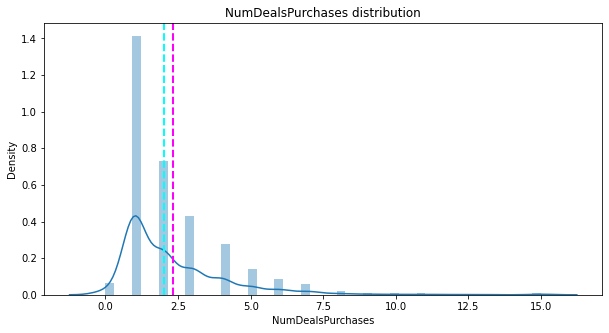

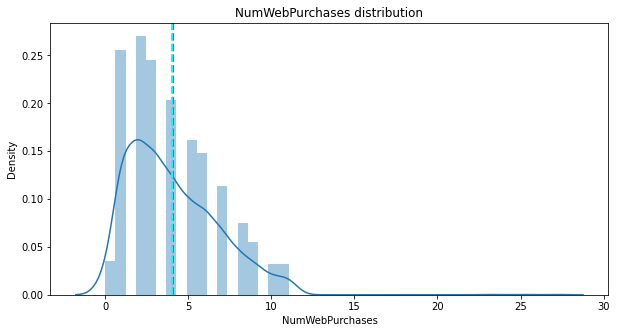

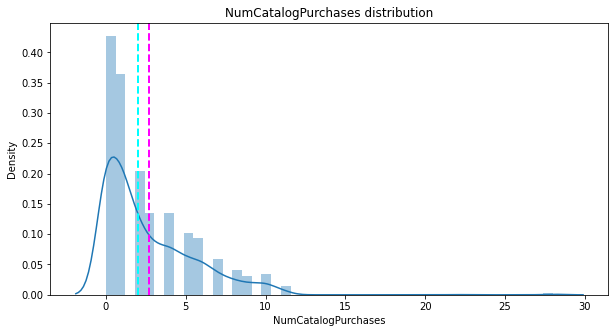

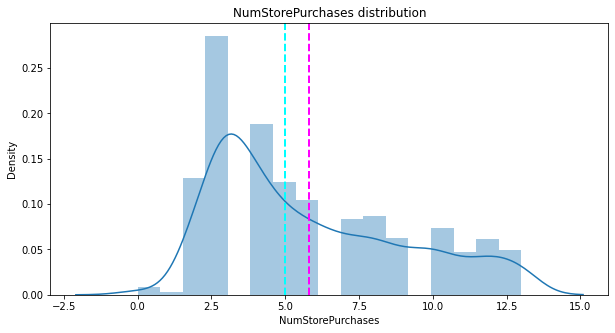

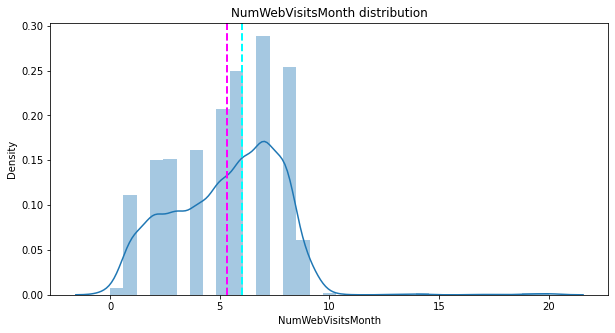

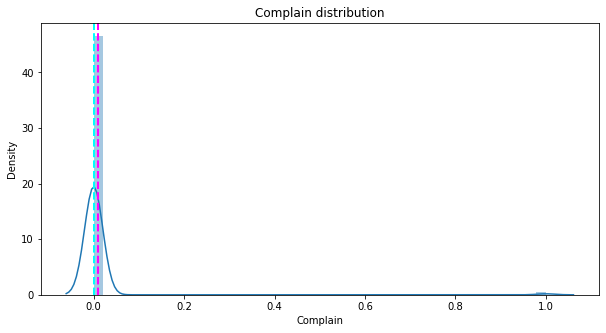

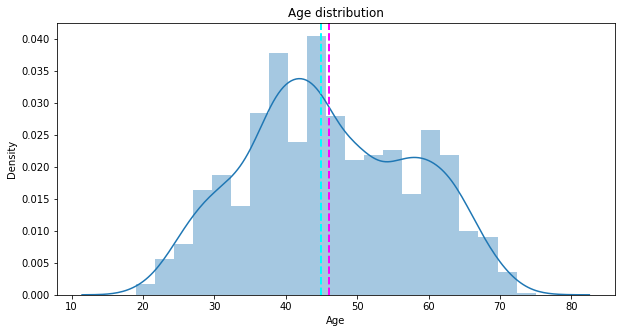

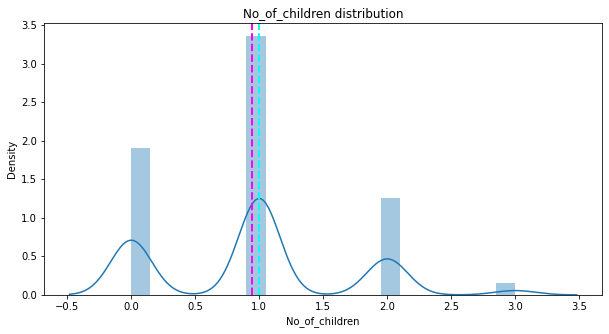

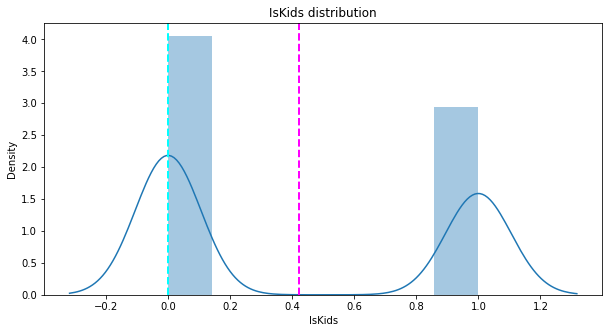

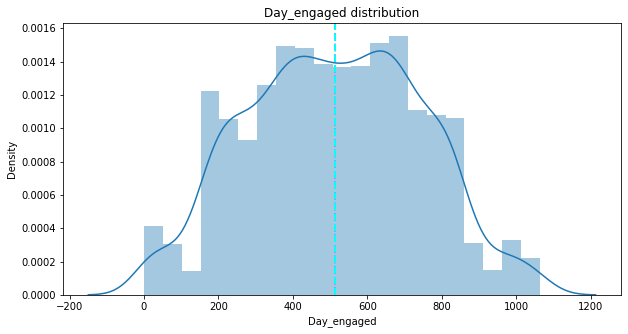

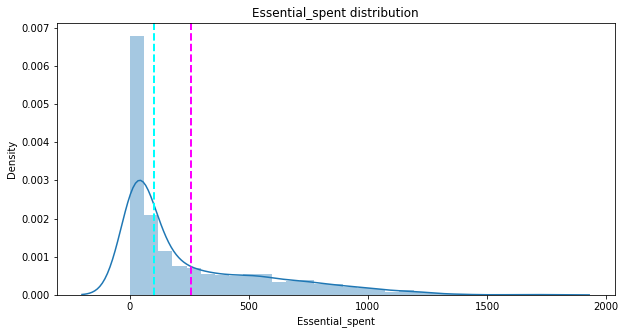

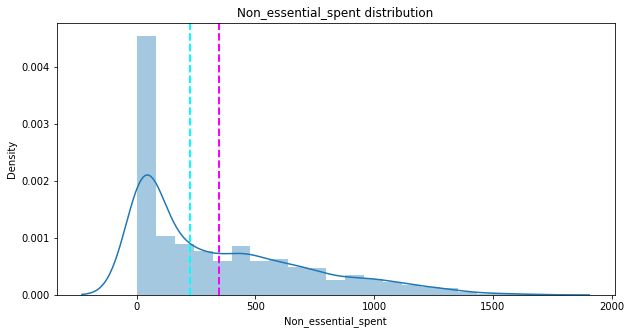

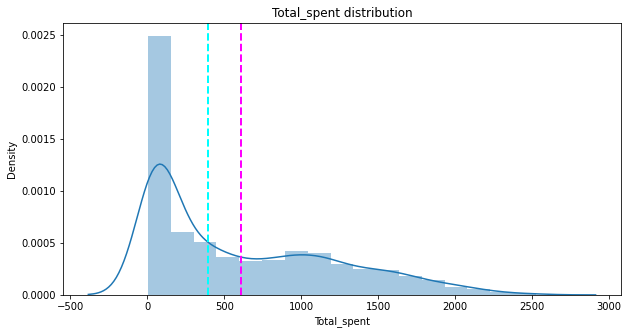

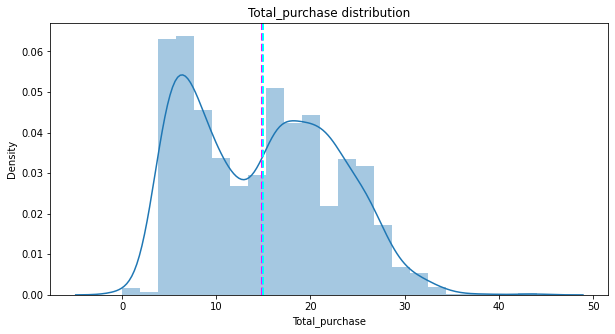

In [ ]:
for col in numerical_features[2:-2]:
  plt.figure(figsize=(10,5))
  sns.distplot(df1[col])
  plt.axvline(df1[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df1[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

Most of the variables are positively skewed.

**Let's have a look on how customer spent their money based on their profile.**

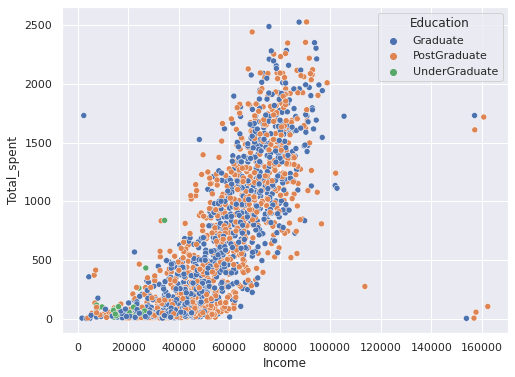

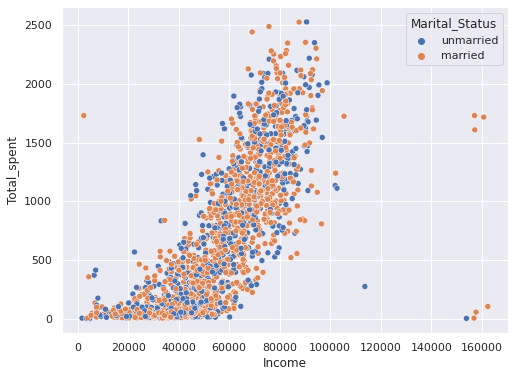

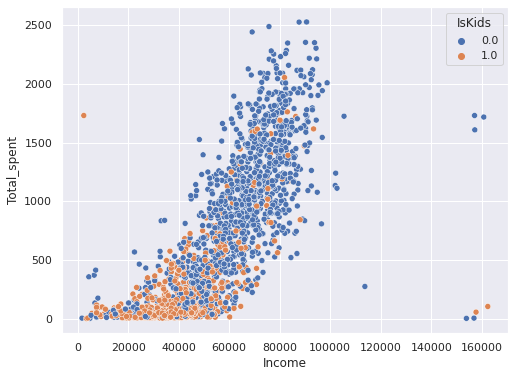

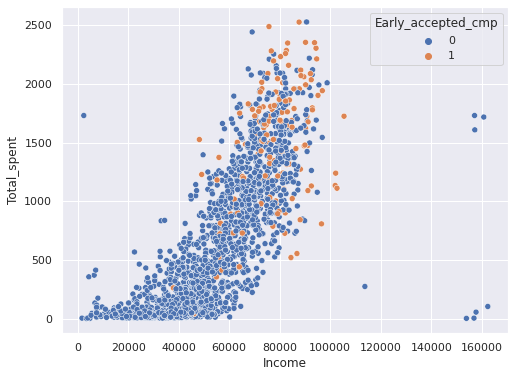

In [ ]:
hue_list = ['Education', 'Marital_Status','IsKids','Early_accepted_cmp']
sns.set(rc={"figure.figsize":(8, 6)})
for hue in hue_list:
 sns.scatterplot(data=df1, x="Income", y="Total_spent", hue=hue)
 plt.show()

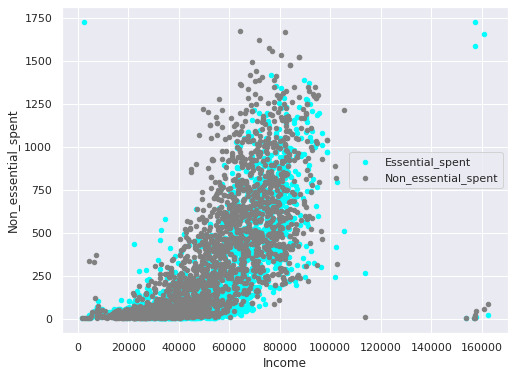

In [ ]:
 ax = df1.plot(kind='scatter',x="Income", y="Essential_spent",color='aqua',label='Essential_spent')
 df1.plot(kind='scatter',x="Income", y="Non_essential_spent",color='grey',label='Non_essential_spent',ax=ax)
 plt.show()

**From the above plots ignoring some of the outliers, following observations can be made**-


*   For undergrad customers, the income as well as the spent is very low. While for graduate and post graduate customers the distribution nearly same where both of them increse their expenditure as the income increases.
*   There is not much effect on the income and expenditure distribution for married and unmarried people.
*   For most of the families having kids, the income and expenditure both are low. While for the family having no kids, the average income as well as the expenditure is a bit higher.

*   One of the observation is that the customers who accepted the campaign earlier, are having a higher average income as well as spent.

*  From the last graph it can be observed that the customer having a little low income are more prone to buy non essential stuffs.


**Have a look on the distribution of Income and Spent with respect to age**

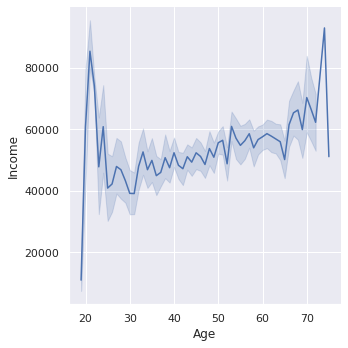

In [ ]:
 sns.relplot(data=df1, x="Age", y="Income",kind='line')
 plt.show()

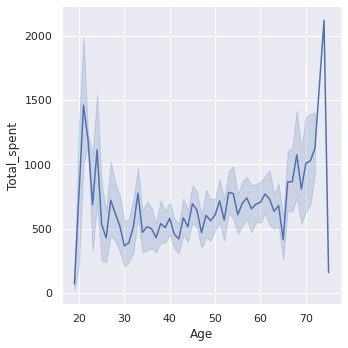

In [ ]:
 sns.relplot(data=df1, x="Age", y="Total_spent",kind='line')
 plt.show()

**Let see how the number of days customer engaged with the company affect the purchasing power.**

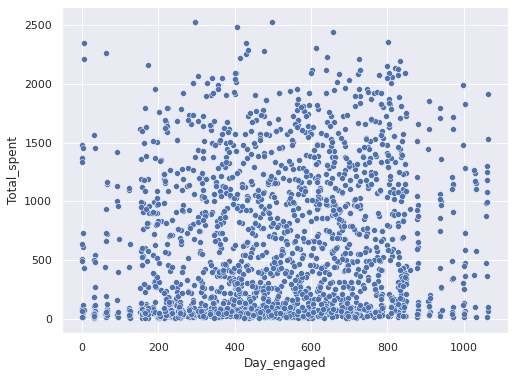

In [ ]:
 sns.scatterplot(data=df1, x="Day_engaged", y="Total_spent")
 plt.show()

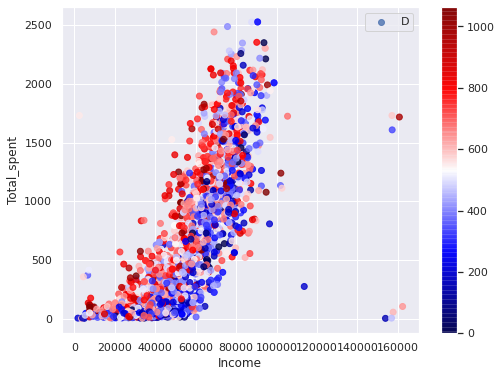

In [ ]:
from matplotlib import legend
plt.scatter(df1.Income, df1.Total_spent, alpha = .8, c = df.Day_engaged, cmap = 'seismic')
cbar = plt.colorbar()
plt.legend('Day_engaged')
plt.xlabel('Income')
plt.ylabel('Total_spent')
plt.show()

**No any noticable pattern is observed.**

**Let's see the correlation between the features.**

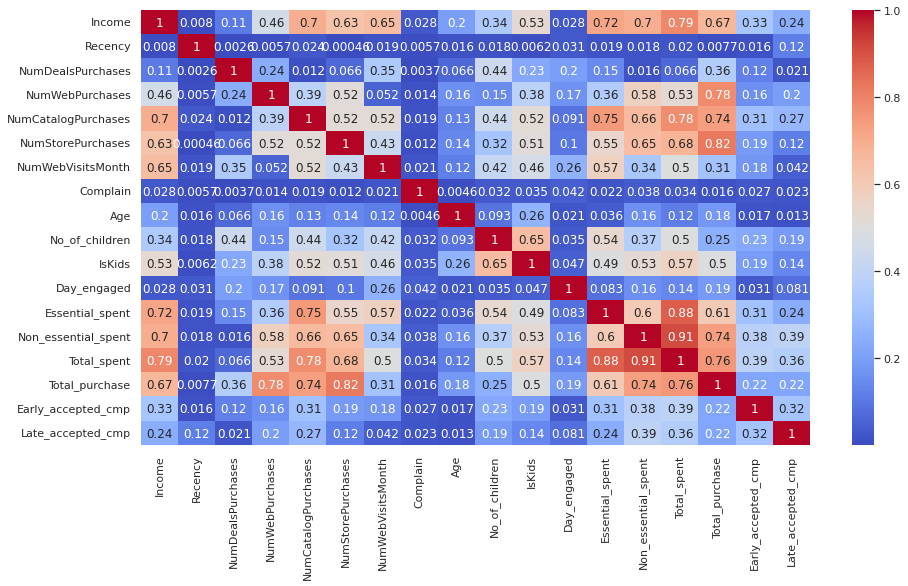

In [ ]:
 ## Correlation between variables
plt.figure(figsize=(15,8))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Here we can observe that there is no significant correlations between the variables except between the original and derived features which is quite natural to have.
Other than this there is some correlation between Income and spent which is again normal to have.

In [ ]:
df1.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,No_of_children,IsKids,Day_engaged,Essential_spent,Non_essential_spent,Total_spent,Total_purchase,Early_accepted_cmp,Late_accepted_cmp
0,Graduate,unmarried,58138.0,58,3,8,10,4,7,0,58,0,0.0,971,894,723,1617,25,0,1
1,Graduate,unmarried,46344.0,38,2,1,1,2,5,0,61,2,1.0,125,10,17,27,6,0,0
2,Graduate,married,71613.0,26,1,8,2,10,4,0,50,0,0.0,472,308,468,776,21,0,0
3,Graduate,married,26646.0,26,2,2,0,4,6,0,31,1,1.0,65,37,16,53,8,0,0
4,PostGraduate,married,58293.0,94,5,5,3,6,5,0,34,1,1.0,321,234,188,422,19,0,0


<a name='s5'></a>
# **Data Preprocessing**

Now as we are heading towards Machine Leaning aprroach for clustering our data, we need to make sure that data is pure,numeric and having minimal & only important set of features.

**Converting the categorical columns to numerical.**

In [ ]:
#Lebel encoding
df2 = df1.copy()
df2['Marital_Status']=df2['Marital_Status'].map({'married':1,'unmarried':0})
df2['Education']=df2['Education'].map({'UnderGraduate':0,'Graduate':1,'PostGraduate':2})

In [ ]:
# Dropping original columns
df2.drop(columns=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases'],axis=1,inplace=True)

**As we have Total_spent, we will drop Essential and Non_essential spent columns**

In [ ]:
df2.drop(columns=['Essential_spent','Non_essential_spent'],axis=1,inplace=True)

In [ ]:
df2.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Age,No_of_children,IsKids,Day_engaged,Total_spent,Total_purchase,Early_accepted_cmp,Late_accepted_cmp
0,1,0,58138.0,58,3,7,0,58,0,0.0,971,1617,25,0,1
1,1,0,46344.0,38,2,5,0,61,2,1.0,125,27,6,0,0
2,1,1,71613.0,26,1,4,0,50,0,0.0,472,776,21,0,0
3,1,1,26646.0,26,2,6,0,31,1,1.0,65,53,8,0,0
4,2,1,58293.0,94,5,5,0,34,1,1.0,321,422,19,0,0


In [ ]:
df2.shape

(2212, 15)

Now we are in a position where we have total 15 features and all of them seems to be uncorrelated for us, so we will not be able furthure reduce the features manually.
But as we know it is important to have less features before clustering so that it will take less computational power as well as the cluster results will explainable and can be visualized.

So we will take the help of PCA(Principal Component Analysis) which is called a dimensionality reduction method to reduce the number of features.

**However before moving towards dimensionality reduction and clustering, it is important to scale all the data so that there is no biasness left in the data.**

### **Scaling the features**

In [ ]:
scaler = StandardScaler()
scaler.fit(df2)
df2 = pd.DataFrame(scaler.transform(df2),columns= df2.columns )

In [ ]:
df2.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Age,No_of_children,IsKids,Day_engaged,Total_spent,Total_purchase,Early_accepted_cmp,Late_accepted_cmp
0,-0.821761,-1.349603,0.287105,0.310353,0.351030,0.692181,-0.09552,1.018352,-1.264598,-0.852512,1.973583,1.676245,1.317945,-0.278294,1.707350
1,-0.821761,-1.349603,-0.260882,-0.380813,-0.168701,-0.132545,-0.09552,1.274785,1.404572,1.173005,-1.665144,-0.963297,-1.159273,-0.278294,-0.585703
2,-0.821761,0.740959,0.913196,-0.795514,-0.688432,-0.544908,-0.09552,0.334530,-1.264598,-0.852512,-0.172664,0.280110,0.796425,-0.278294,-0.585703
3,-0.821761,0.740959,-1.176114,-0.795514,-0.168701,0.279818,-0.09552,-1.289547,0.069987,1.173005,-1.923210,-0.920135,-0.898513,-0.278294,-0.585703
4,1.016192,0.740959,0.294307,1.554453,1.390492,-0.132545,-0.09552,-1.033114,0.069987,1.173005,-0.822130,-0.307562,0.535666,-0.278294,-0.585703


**All features are scaled now.**

<a name='s11'></a>
# **Principal Component Analysis(PCA)**

**We will be reducing our dimensions from 15 to 3**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df2)
PCA_df = pd.DataFrame(pca.transform(df2), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,5.460771e-17,2.002874,-5.025047,-1.851593,-0.255831,1.623176,5.026679
col2,2212.0,9.636656e-18,1.323351,-3.326796,-0.931939,-0.227761,0.677680,6.808271
col3,2212.0,5.460771e-17,1.144552,-3.180950,-0.786366,-0.102425,0.766087,3.566950


**Lets visualise the distribution of our data with reduced dimension.**

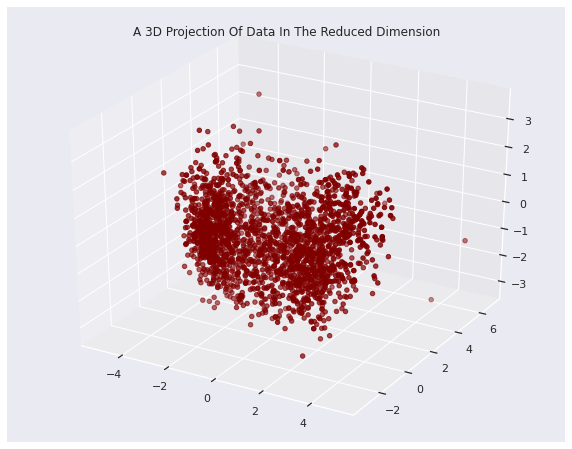

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

**Now before using the ML model for clustering, we will once try to create the RFM model, which is a Non-ML model but famous in the industry.**

<a name='s6'></a>
# **Creating the RFM model (Recency, Frequency,Monetary value)**

Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: Recency: The number days since the customer has last purchased, Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on

### **Performing RFM Segmentation and RFM Analysis, Step by Step**

**Step 1 - Assigning Recency, Frequency and Monetary values to each customer**

In [ ]:
rfm_df = df[['ID','Recency','Total_purchase','Total_spent']]
rfm_df.rename(columns={'ID':'Customer_Id','Total_purchase':'Frequency','Total_spent':'Monetary'},inplace=True)
rfm_df.reset_index()
rfm_df.head()

,Customer_Id,Recency,Frequency,Monetary
0,5524,58,25,1617
1,2174,38,6,27
2,4141,26,21,776
3,6182,26,8,53
4,5324,94,19,422


In [ ]:
rfm_df.shape

(2212, 4)

In [ ]:
rfm_df.nunique()

Customer_Id    2212
Recency         100
Frequency        39
Monetary       1047
dtype: int64

In [ ]:
rfm_df.Recency.describe()

count    2212.000000
mean       49.019439
std        28.943121
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

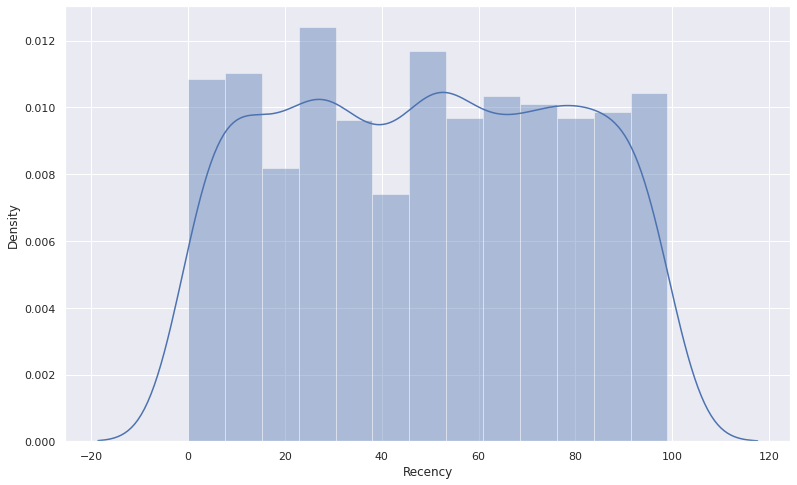

In [ ]:
#Recency distribution plot
import seaborn as sns
x = rfm_df['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [ ]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    2212.000000
mean       14.891501
std         7.671629
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: Frequency, dtype: float64

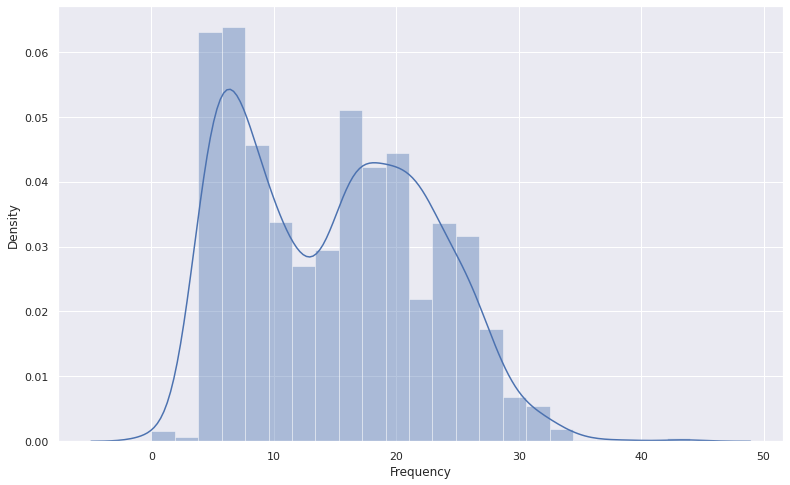

In [ ]:
#Frequency distribution plot
import seaborn as sns
x = (rfm_df['Frequency'])
plt.figure(figsize=(13,8))
sns.distplot(x)

In [ ]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count    2212.000000
mean      607.268083
std       602.513364
min         5.000000
25%        69.000000
50%       397.000000
75%      1048.000000
max      2525.000000
Name: Monetary, dtype: float64

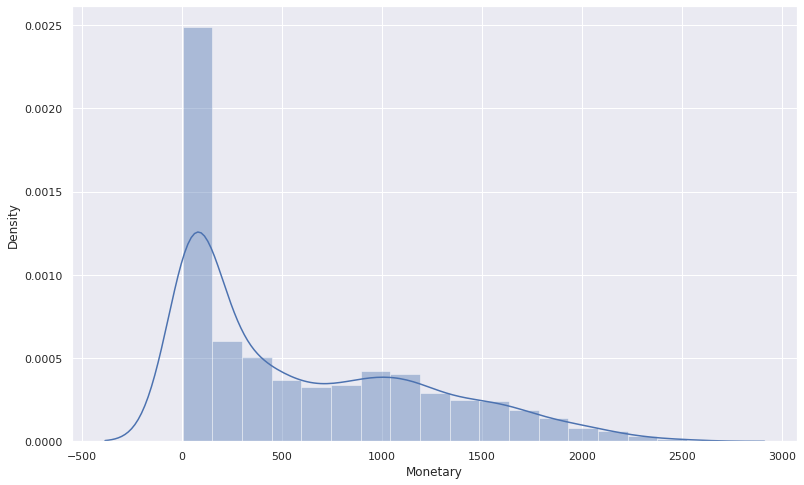

In [ ]:
#Monateray distribution plot
import seaborn as sns
x =(rfm_df['Monetary'])
plt.figure(figsize=(13,8))
sns.distplot(x)


**This is positively skewed.**

**Step 2 - Split into four segments using quantiles**

In [ ]:
#Split into four segments using quantiles
quantiles = rfm_df[['Recency','Frequency','Monetary']].quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
quantiles

{'Recency': {0.25: 24.0, 0.5: 49.0, 0.75: 74.0},
 'Frequency': {0.25: 8.0, 0.5: 15.0, 0.75: 21.0},
 'Monetary': {0.25: 69.0, 0.5: 397.0, 0.75: 1048.0}}

**Step 3 - Defining a function to generate score based on quantiles**

In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

**Step 4 - Applying the function**

In [ ]:
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Customer_Id,Recency,Frequency,Monetary,R,F,M
0,5524,58,25,1617,3,1,1
1,2174,38,6,27,2,4,4
2,4141,26,21,776,2,2,2
3,6182,26,8,53,2,4,4
4,5324,94,19,422,4,2,2


**Step 5 - Calculating RFM Score**

In [ ]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.sort_values('RFMScore')

,Customer_Id,Recency,Frequency,Monetary,R,F,M,RFMScore
740,5682,8,30,1099,1,1,1,3
1672,3690,20,22,2091,1,1,1,3
1066,3005,7,23,1650,1,1,1,3
1071,11112,23,25,1477,1,1,1,3
51,4114,2,29,1693,1,1,1,3
...,...,...,...,...,...,...,...,...
171,6460,78,7,57,4,4,4,12
2054,6382,97,5,54,4,4,4,12
1291,5068,75,5,26,4,4,4,12
589,4179,94,6,55,4,4,4,12


In [ ]:
rfm_df['RFMScore'].value_counts()

7     312
6     310
10    279
9     274
5     257
8     230
4     210
11    162
12    127
3      51
Name: RFMScore, dtype: int64

**So based on the RFM Score we can divide the customers to certain numbers of clusters based on our demand. The lower the RFM score the more loyal is the customer.**

### **Now let us try to cluster using ML approach**

<a name='s7'></a>
# **Model Selection**

Coming to the selecting ML model for clustering the data with multiple class, we have mainly two models-

**1. K-Means Clustering**

**2. Hierarchical Clustering**

Well, both models have its own pros and cons and **Hierarchical clustering has a limit for only small dataset**. Since we have a small dataset, we will try both the models one by one and will see which is creating a better cluster.

<a name='s8'></a>
# **K-Means Clustering**

So one of the drawbacks of K-Means Clustering is that we have to decide the number of cluster prior to applying the model. Now to choose the best number of clusters we have also two methods-

**1. Elbow method**

**2. Silhouette Score method**

we will go here with Elbow mwthod.
Here the data we will be using the one which we got after apllying PCA.

### **Elbow Method**

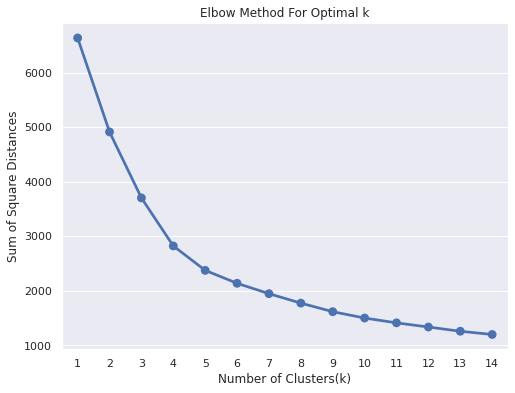

In [ ]:
#Scaling the PCA features
features=['col1','col2','col3']
X_features=PCA_df[features].values
scaler=StandardScaler()
X_transformed=scaler.fit_transform(X_features)
X=X_transformed

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000,random_state=0)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Here 4 seems to be an optimal number of clusters for this data.**

**Let's apply K-Means Clustering with 4 clusters.**

In [ ]:
#Applying KMeans clustering model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=11)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

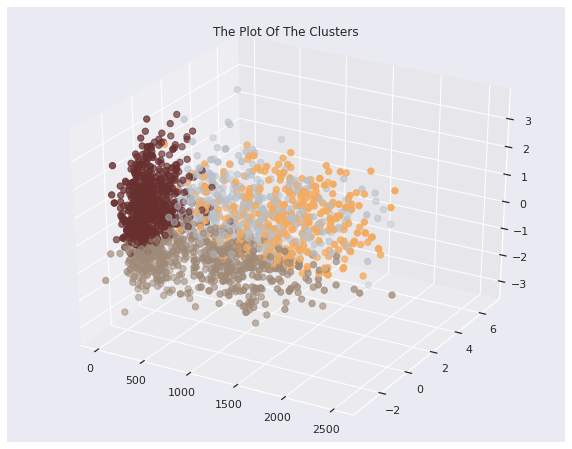

In [ ]:
#Plotting the clusters
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#682F2F", "#D6B2B1", "#B9C0C9", "#9E726F", "#9F8A78", "#F3AB60"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=y_kmeans, marker='o',cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

We can see how our data has been clustered into 4 parts. Just by looking at it we can not interpret which cluster is showing what, because thats the one of drawbacks of PCA that the final features after dimensionality reduction has no conceptual meaning. That's why can't judge the clusters in this graph.

Now one of the way to interpret it is to look at our features with respect to clusters via exploratory data analysis and then judge it.

**At first, let's look at the distribution of clusters**

In [ ]:
# Adding the cluster data to our original dataset
df1['Clusters'] = y_kmeans

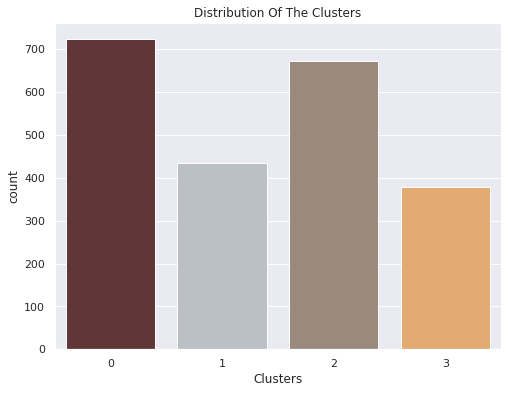

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df1["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

**Income and Spent distribution with respect to each clusters**

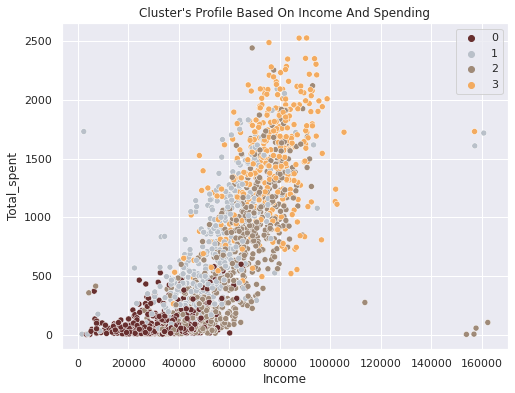

In [ ]:
pl = sns.scatterplot(data = df1,y=df1["Total_spent"], x=df1["Income"],hue=df1["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

It can be clearly visualise that 

cluster 0 : are the customers having low income and low spent while
 
cluster 3 : are the ones having high income and high spent. On the other hand 

clusters 1 and 2 : are having medium income and medium spent. But there might some difference in these two clusters also which is not observable from this distribution and we will try to find it out from other distributions.

In [ ]:
df1.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,...,Day_engaged,Essential_spent,Non_essential_spent,Total_spent,Total_purchase,Early_accepted_cmp,Late_accepted_cmp,Clusters,Clusters2,temp_clusters
0,Graduate,unmarried,58138.0,58,3,8,10,4,7,0,...,971,894,723,1617,25,0,1,3,2,1.0
1,Graduate,unmarried,46344.0,38,2,1,1,2,5,0,...,125,10,17,27,6,0,0,2,3,3.0
2,Graduate,married,71613.0,26,1,8,2,10,4,0,...,472,308,468,776,21,0,0,2,0,2.0
3,Graduate,married,26646.0,26,2,2,0,4,6,0,...,65,37,16,53,8,0,0,0,1,0.0
4,PostGraduate,married,58293.0,94,5,5,3,6,5,0,...,321,234,188,422,19,0,0,2,2,1.0


Let's have a look on box plots for some variables, grouped by clusters

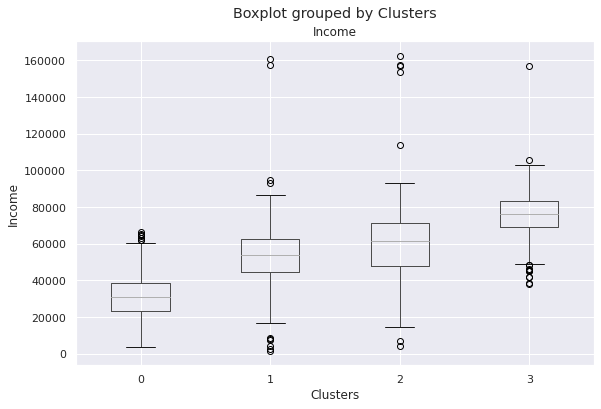

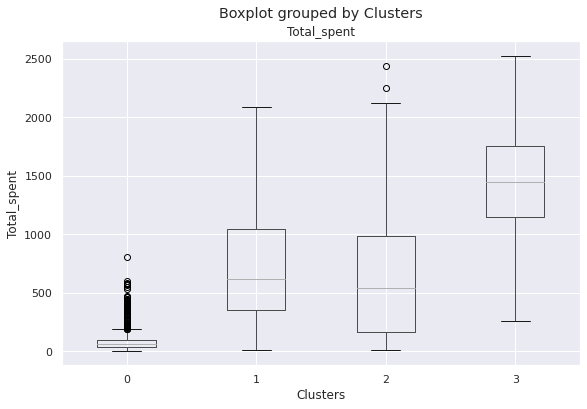

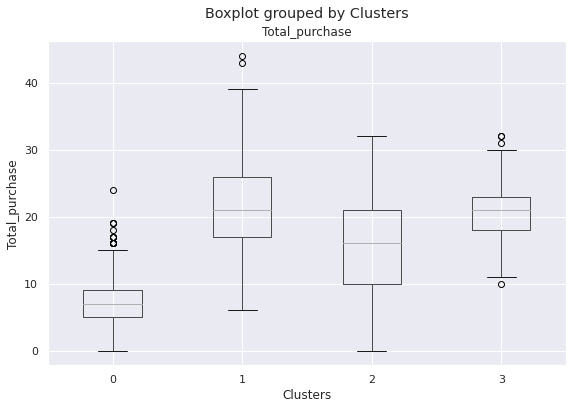

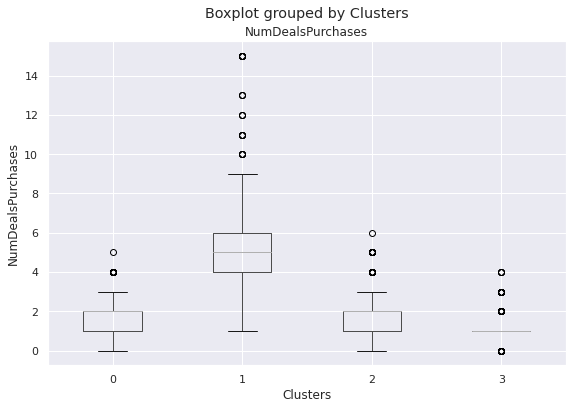

In [ ]:
col = ['Income','Total_spent','Total_purchase','NumDealsPurchases']
for col in col:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  df1.boxplot(column = col, by = 'Clusters', ax = ax)
  ax.set_ylabel(col)
  plt.show()

So here we can clearly see the difference between cluster 1 and 3, despite of having similar Income and Total spent behaviour, there is a difference in the Total number of purchases and and purchases done during deals(with discounts) for the two clusters.

Following colclusions can be made from the above plots-


*   Since cluster 0 has low income and very low expanditure while most of them are during deals, we need to give them more deals so that some of the outliers having a little high income can be converted to loyal customer.
*   Cluster 1 seems to be in border of being a loyal customer and we need to make some strategy to give a little push towards loyal customer.

*   Cluster 3 is our most loyal customer having high income, high spent and most of the purchases are without any discounts.
*   Cluster 2 is similar to cluster 1, the only difference is that cluster2 is having less number purchases through deals.







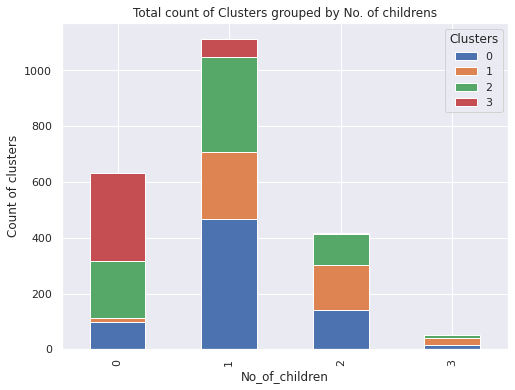

In [ ]:
df1.groupby(['No_of_children', 'Clusters']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Total count of Clusters grouped by No. of childrens')
plt.ylabel('Count of clusters')
plt.show()

**Now let us try with hierarchical clustering**

<a name='s9'></a>
# **Hierarchical Clustering**

**Let's find the optimal number of clusters using dendogram**

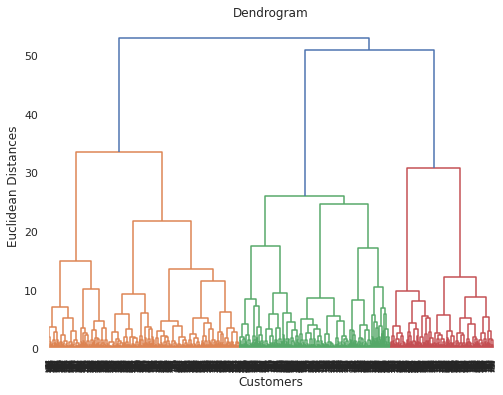

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

Here if we cut the vertical lines between the euclidean distance 20-30, we will get 6 clusters while, if we cut it between 30-40 we will have 4 clusters.
Since it is of our choice and depends on the situations,here we will go with 4 clusters as we already have made 4 clusters with K-Means Clustering.

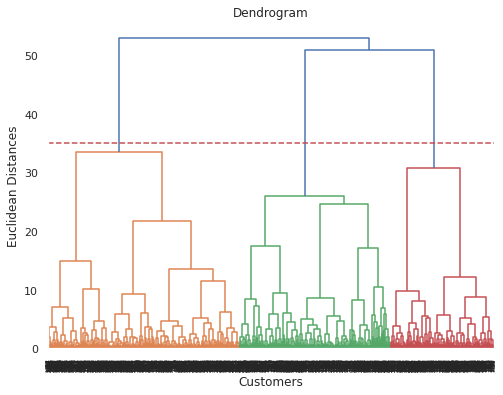

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=35, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.**

**No. of Cluster  = 4**

In [ ]:
from pandas.core.common import random_state
# Fitting hierarchical clustering using AgglomerativeClustering approach and ward linkage
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

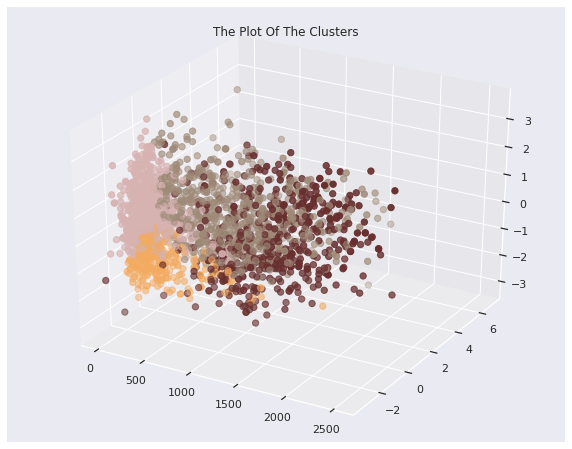

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#682F2F","#B9C0C9", "#D6B2B1","#9E726F", "#9F8A78", "#F3AB60"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=y_hc, marker='o',cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

There is a little bit difference from the K-Means cluster, but not much.
Let's have a look on other variable distribution to understand it.

In [ ]:
# Adding the cluster data to our original dataset
df1['Clusters2'] = y_hc

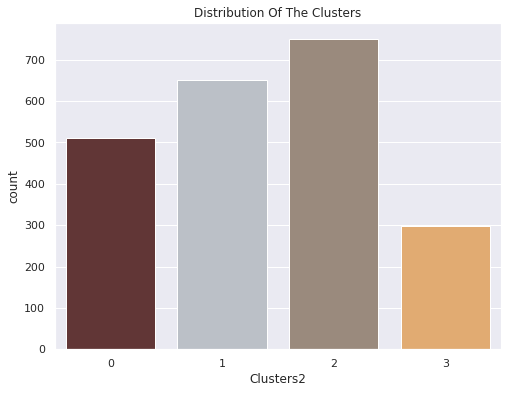

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df1["Clusters2"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

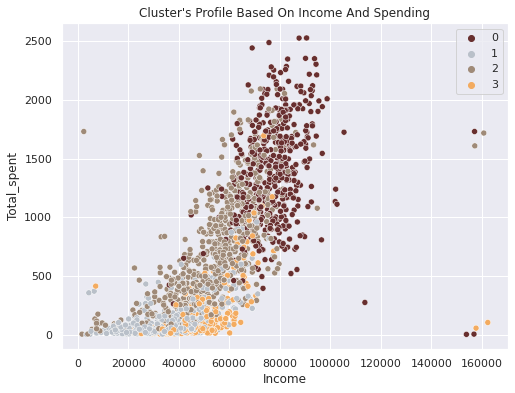

In [ ]:
pl = sns.scatterplot(data = df1,y=df1["Total_spent"], x=df1["Income"],hue=df1["Clusters2"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Definately the hierarchical clusters are having similar distribution to the K-Means Clusters. But we need to look at the distributions of other variables with respect to clusters to compare it from K-Means clusters.

Let's look at the number of data where the K-Means cluster is not equal to Hierarchical cluster.
just to compare it we will rename the Hierarchical clusters.

In [ ]:
#Renaming the Clusters(changing its order)
df1.loc[df1['Clusters2']==0, 'temp_clusters'] = 2
df1.loc[df1['Clusters2']==1, 'temp_clusters'] = 0
df1.loc[df1['Clusters2']==2, 'temp_clusters'] = 1
df1.loc[df1['Clusters2']==3, 'temp_clusters'] = 3

In [ ]:
unequal_df = df1[df1['Clusters']!=df1['temp_clusters']]

In [ ]:
unequal_df.shape

(1039, 23)

So we have 563 data values whose label in K-Means clusters is different from Hierarchical clusters.
So there is a little variation from K-Means clustering.

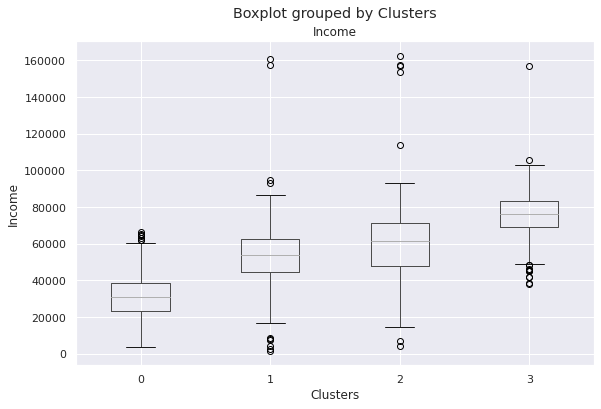

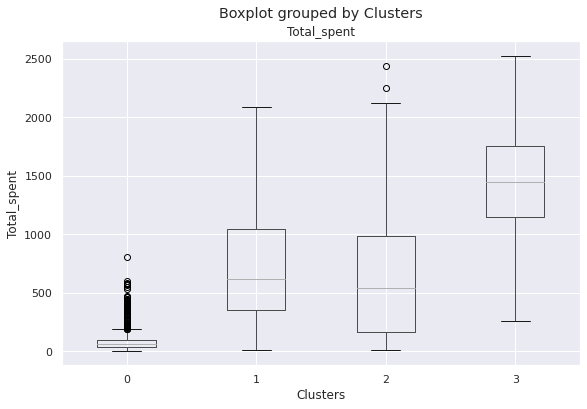

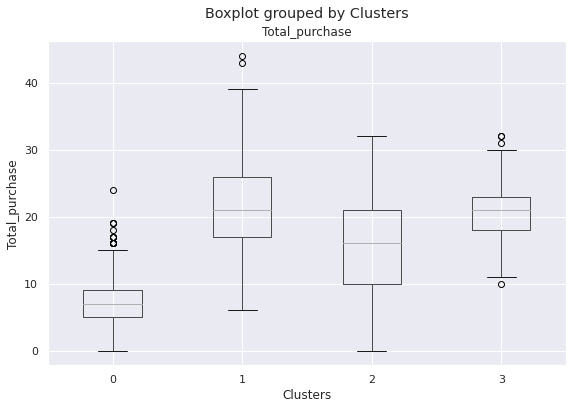

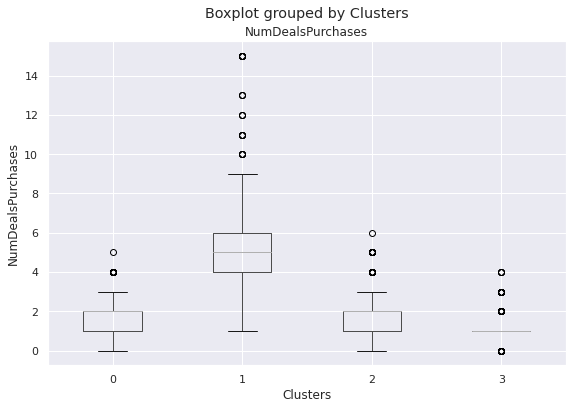

In [ ]:
col = ['Income','Total_spent','Total_purchase','NumDealsPurchases']
for col in col:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  df1.boxplot(column = col, by = 'Clusters', ax = ax)
  ax.set_ylabel(col)
  plt.show()

**Since the trend seems to be similar as of K-Means cluster. We will consider the conclusions made through K-Means Clusters**

<a name='s10'></a>
# **Conclusions**

In this project we have used non-supervised ML model - KMeans clustering and Hierarchical clustering too cluster the data. We also used a non-ML model -RFM model to show how we can cluster based on our choice on the basis of RFM score.

The optimal number of cluster we found through ML model is 4 which is a very good number of cluster as we were able to interpret it. We furthure found the distribution of features grouped by clusters to make decisions based on our customer behaviour.
